<a href="https://colab.research.google.com/github/dimanchief13-spec/Univercity/blob/main/Tasks/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%208%20%22%D0%94%D0%9F%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B2_GeoPandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №2. Работа с векторными данными в GeoPandas**

In [ ]:
%%capture
!pip install geopandas leafmap mapclassify # Устанавливаем библиотеку GeoPandas и необходимые зависимости

## **Задание №1. Операции с массивами NumPy и геопространственными координатами**


1. Создайте двумерный массив NumPy, содержащий широту и долготу следующих городов: Токио (35.6895, 139.6917), Нью-Йорк (40.7128, -74.0060), Лондон (51.5074, -0.1278) и Париж (48.8566, 2.3522).


In [ ]:
import numpy as np

matrix = np.array([[35.6895, 139.6917], [40.7128, -74.0060], [51.5074, -0.1278], [48.8566, 2.3522]])
matrix

array([[ 3.568950e+01,  1.396917e+02],
       [ 4.071280e+01, -7.400600e+01],
       [ 5.150740e+01, -1.278000e-01],
       [ 4.885660e+01,  2.352200e+00]])

2. Преобразуйте значения широты и долготы из градусов в радианы с помощью функции np.radians().


In [ ]:
np.radians(matrix)

array([[ 6.22899283e-01,  2.43808010e+00],
       [ 7.10572408e-01, -1.29164837e+00],
       [ 8.98973719e-01, -2.23053078e-03],
       [ 8.52708531e-01,  4.10536347e-02]])



3. Рассчитайте поэлементную разницу между координатами Токио и других городов в радианах.

In [ ]:
Tokyo = np.array([35.6895, 139.6917])
New_York = np.array([40.7128, -74.0060])
London = np.array([51.5074, -0.1278])
Paris = np.array([48.8566, 2.3522])

print(Tokyo - New_York)
print(Tokyo - London)
print(Tokyo - Paris)

[ -5.0233 213.6977]
[-15.8179 139.8195]
[-13.1671 137.3395]


## **Задание 2. Операции с DataFrame Pandas и геопространственными данными**


1. Загрузите набор данных о городах мира по следующему URL с помощью Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [ ]:
import pandas as pd

df_loaded = pd.read_csv('https://github.com/opengeos/datasets/releases/download/world/world_cities.csv', encoding='utf-8')

2. Отобразите первые 5 строк и проверьте наличие отсутствующих значений.


In [ ]:
df_loaded.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


3. Отфильтруйте набор данных, чтобы включить только города с населением более 1 миллиона человек.


In [ ]:
df_loaded[df_loaded['population'] > 1000000]

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


4. Сгруппируйте города по странам и рассчитайте общую численность населения для каждой страны.


In [ ]:
by_country = df_loaded.groupby('country').agg({
    'population': 'sum'
})
by_country

,population
country,
AFG,4931702
AGO,6821544
ALB,895350
ALD,10682
AND,53998
...,...
WSM,61916
YEM,3759000
ZAF,13373789




5. Отсортируйте города по населению в порядке убывания и отобразите первые 10 городов.

In [ ]:
sorted = by_country.sort_values('population', ascending = False)
sorted.head(10)

,population
country,
CHN,217132049
USA,156465416
IND,154810226
BRA,80794236
JPN,65779390
RUS,47306359
MEX,44222027
IDN,27339158
PAK,26416033


## **Задание №3. Создание и обработка GeoDataFrames с помощью GeoPandas**


1. Загрузите набор данных о зданиях Нью-Йорка из файла GeoJSON с помощью GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson

In [ ]:
import geopandas as gpd

gdf = gpd.read_file('https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson')

2. Создайте график контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


<Axes: >

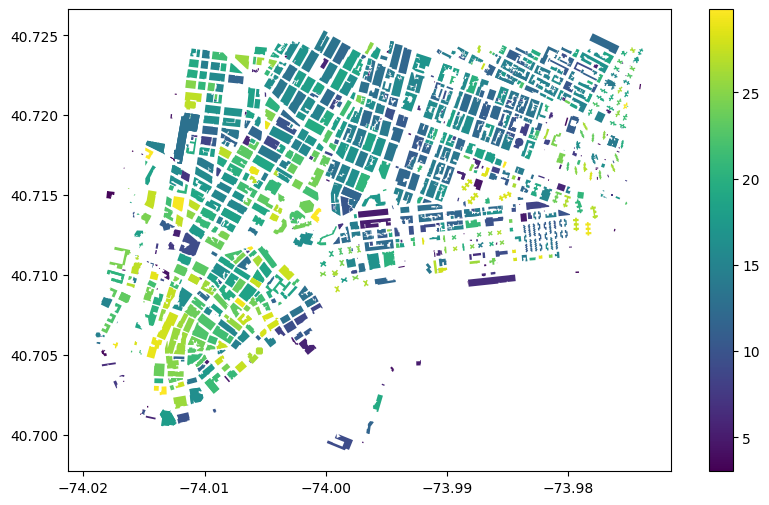

In [ ]:
import matplotlib.pyplot as plt

gdf.plot(column='height_MS', legend=True, figsize=(10, 6))

3. Создайте интерактивную карту контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


In [ ]:
%%capture
!pip install folium matplotlib mapclassify

In [ ]:
gdf.explore(column='height_MS')

4. Рассчитайте среднюю высоту зданий (используйте столбец `height_MS`).


In [ ]:
avg_height = gdf['height_MS'].mean()
print(avg_height)

15.454691136974038


5. Выберите здания с высотой, превышающей среднюю высоту.


In [ ]:
new_gdf = gdf[gdf['height_MS'] > avg_height]
new_gdf

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
5,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."
...,...,...,...,...,...,...,...,...
1196,9714,19.90,19.15,19.52,1230.57,36,New York,"POLYGON ((-73.98328 40.71861, -73.9826 40.7184..."
1198,9752,19.35,NaN,19.35,4080.25,36,New York,"POLYGON ((-73.99528 40.70245, -73.99568 40.702..."
1199,9754,24.11,47.47,35.79,7137.13,36,New York,"POLYGON ((-74.00084 40.71547, -74.00075 40.715..."
1200,9756,16.20,15.17,15.68,166.41,36,New York,"POLYGON ((-73.99054 40.71271, -73.99045 40.712..."





6. Сохраните GeoDataFrame в новый файл GeoJSON.

In [ ]:
new_gdf.to_file('buildings_above_avg_height_NY.geojson', driver='GeoJSON')
print("Данные сохранены в GeoJSON")

Данные сохранены в GeoJSON


## **Задание №4. Применение NumPy, Pandas и GeoPandas для обработки и анализа пространственных данных**


1. Используйте Pandas для загрузки набора данных о городах мира по следующему URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [ ]:
world_cities_df = pd.read_csv('https://github.com/opengeos/datasets/releases/download/world/world_cities.csv', encoding='utf-8')
world_cities_df

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


2. Отфильтруйте набор данных, чтобы включить только города с широтой между -40 и 60 (т.е. города, расположенные в Северном полушарии или вблизи экватора).


In [ ]:
filter = (world_cities_df['latitude'] > -40) & (world_cities_df['latitude'] < 60)
nh_cities_df = world_cities_df[filter]
nh_cities_df

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


3. Создайте GeoDataFrame из отфильтрованного набора данных, преобразовав широту и долготу в геометрии.


In [ ]:
nh_cities_gdf = gpd.GeoDataFrame(
    nh_cities_df,
    geometry=gpd.points_from_xy(nh_cities_df['longitude'], nh_cities_df['latitude']),
    crs = 'EPSG:4326'
)
nh_cities_gdf

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (7.315 45.737)
...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-43.22502 -22.92502)
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-46.62502 -23.55868)
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (151.18518 -33.92001)
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (103.85582 1.29303)


4. Перепроецируйте GeoDataFrame в проекцию Меркатора (EPSG:3857).


In [ ]:
nh_cities_gdf = nh_cities_gdf.to_crs('EPSG:3857')
nh_cities_gdf.head()

,id,name,country,latitude,longitude,population,geometry,distance
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (3621590.39 64933.781),56.950183
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (3370197.584 74697.086),55.709612
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (1758736.635 4959679.293),15.778768
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (1631498.457 5095742.084),14.324519
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (814302.075 5738302.989),5.883188


5. Рассчитайте расстояние (в метрах) между каждым городом и Парижем.


In [ ]:
paris_point = nh_cities_gdf[nh_cities_gdf['name'] == 'Paris'].iloc[0].geometry

nh_cities_gdf['distance'] = nh_cities_gdf.geometry.distance(paris_point)

nh_cities_gdf.head()


,id,name,country,latitude,longitude,population,geometry,distance
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (3621590.39 64933.781),7.041672e+06
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (3370197.584 74697.086),6.916454e+06
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (1758736.635 4959679.293),1.979335e+06
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (1631498.457 5095742.084),1.794231e+06
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (814302.075 5738302.989),7.561058e+05




6. Отобразите города на карте мира, раскрасив точки в зависимости от их расстояния до Парижа.

In [ ]:
nh_cities_gdf.explore(column='distance')